In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables
from omegaconf import OmegaConf
from utils import unscale

cfg = OmegaConf.load("configs/sampling-czech.yaml")

PLOT_MINUTES = 30  

# High-resolution CTG signal length:
TS_LENGTH = cfg.input_size
FREQ = cfg.freq
SAMPLES_PER_MIN = FREQ * 60
factors = cfg.scale_factors

# generated samples:
## CSV file:
##input_file_sr = f"results/synthetic-{TS_LENGTH}/sample_{sample_id}_{TS_LENGTH}.csv"




In [18]:
def plot_patient_data(patient_data, title=""):
    plt.figure()
    fig, axs = plt.subplots(2, 1)
    fig.set_figwidth(20)
    # get column names
    cols = patient_data.columns

    # plot first column
    axs[0].plot(patient_data[cols[0]])
    axs[0].set_title(cols[0])
    axs[1].plot(patient_data[cols[1]], color="orange")
    axs[1].set_title(cols[1])

    # add x-ticks to the bottom subplot after every 60 seconds and make the label as minutes
    axs[1].set_xticks(np.arange(0, (PLOT_MINUTES + 1) * SAMPLES_PER_MIN, SAMPLES_PER_MIN))
    axs[0].set_xticks(np.arange(0, (PLOT_MINUTES + 1) * SAMPLES_PER_MIN, SAMPLES_PER_MIN))
    axs[1].set_xticklabels(np.arange(0, PLOT_MINUTES + 1, 1))
    # decrease xtick font size and make the label diagonal
    plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right", fontsize=7)    

    #axs[0].set_yticks(np.arange(factors.fhr_min, factors.fhr_max + 10, 25))
    #axs[1].set_yticks(np.arange(factors.uc_min, factors.uc_max + 10, 10))

    # x label as minutes
    axs[1].set_xlabel("minutes")

    # remove x-axis labels from the top subplot
    plt.setp(axs[0].get_xticklabels(), visible=False)
    plt.suptitle(title)
    # add grid
    axs[0].grid()
    axs[1].grid()

    #axs[1].set_ylim(factors.uc_min, factors.uc_max)
    #axs[0].set_ylim(factors.fhr_min, factors.fhr_max)
     
    axs[0].set_xlim(0, PLOT_MINUTES * SAMPLES_PER_MIN)
    axs[1].set_xlim(0, PLOT_MINUTES * SAMPLES_PER_MIN)
  


<Figure size 640x480 with 0 Axes>

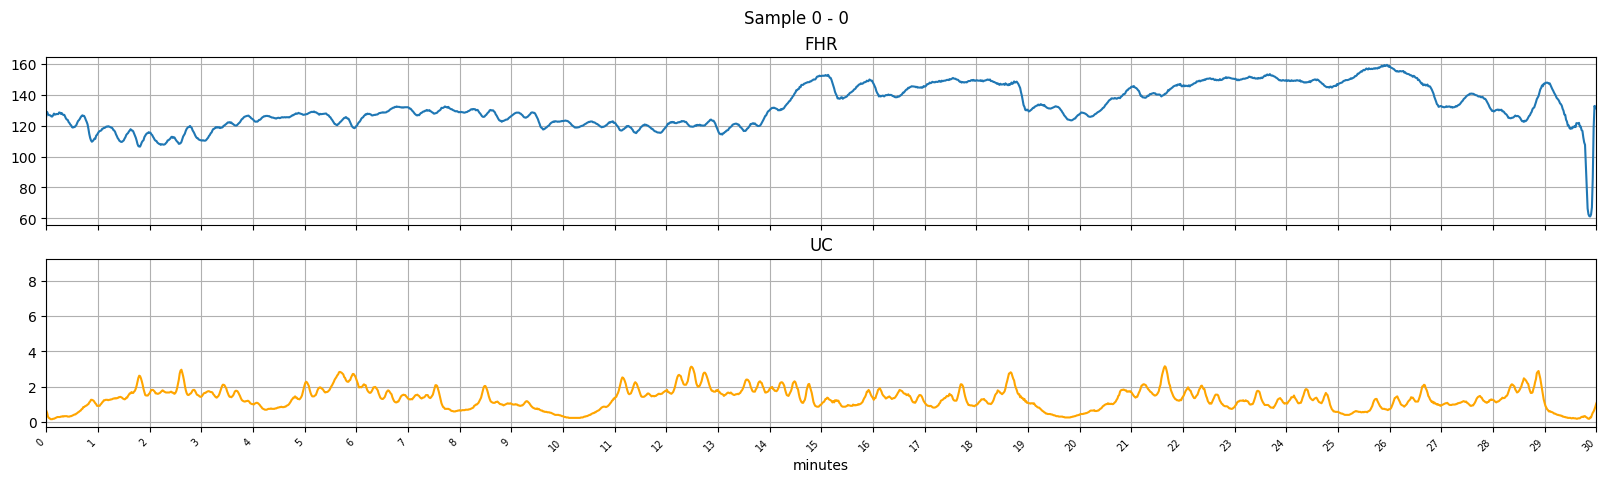

<Figure size 640x480 with 0 Axes>

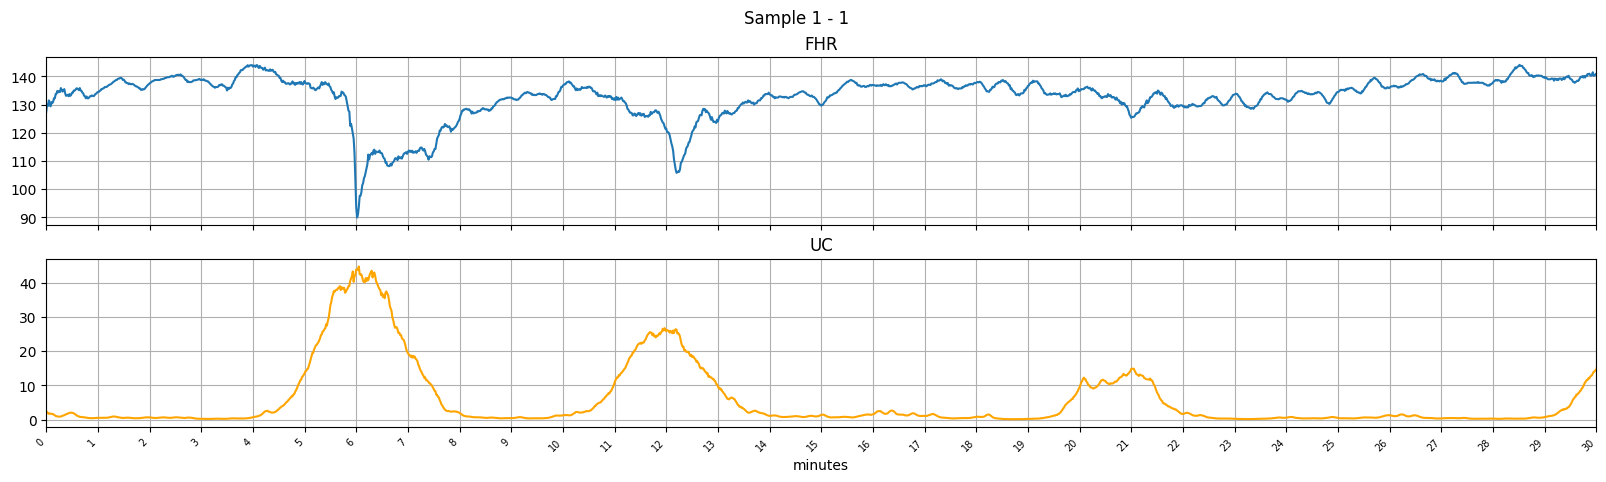

<Figure size 640x480 with 0 Axes>

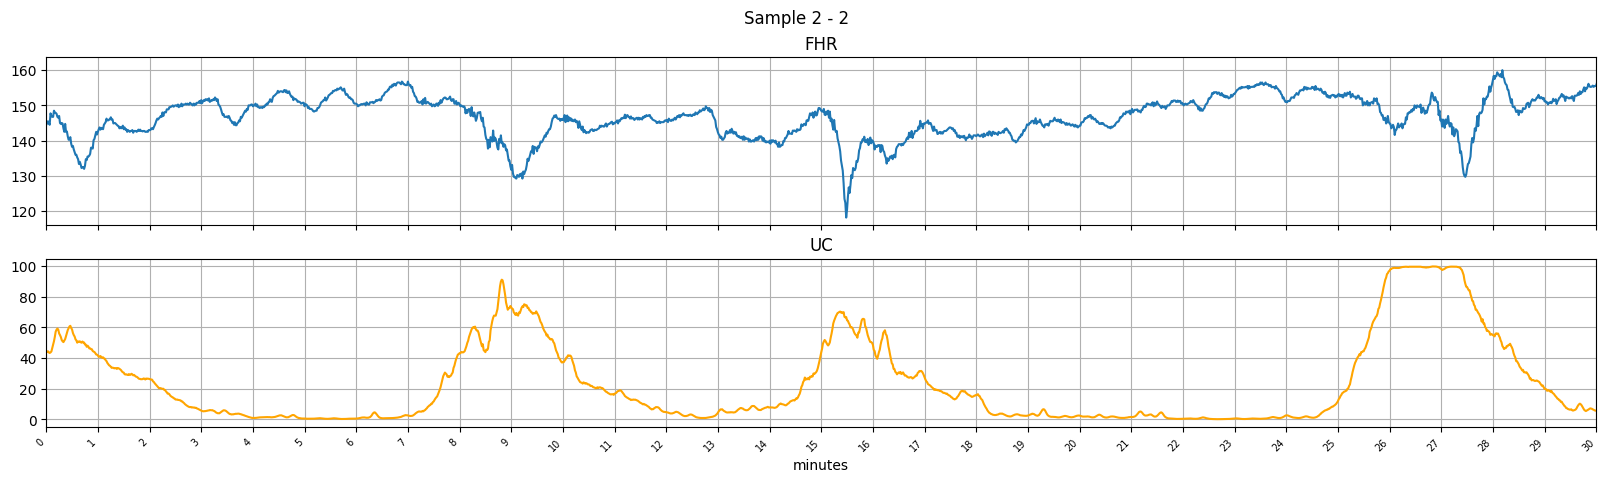

<Figure size 640x480 with 0 Axes>

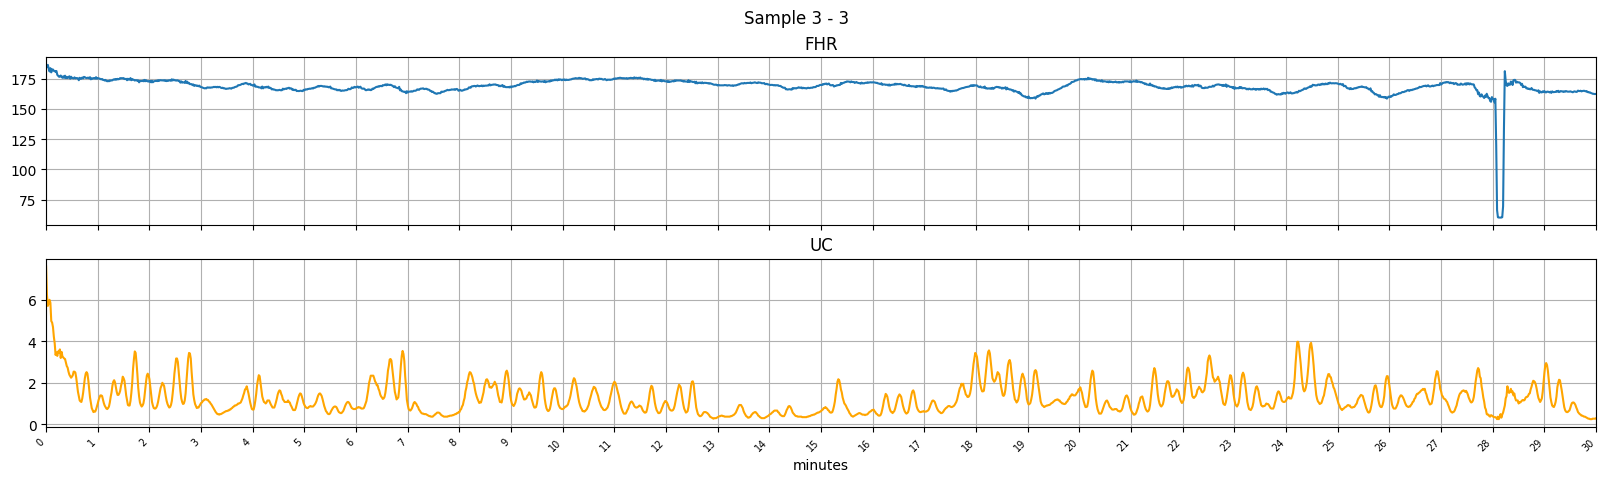

<Figure size 640x480 with 0 Axes>

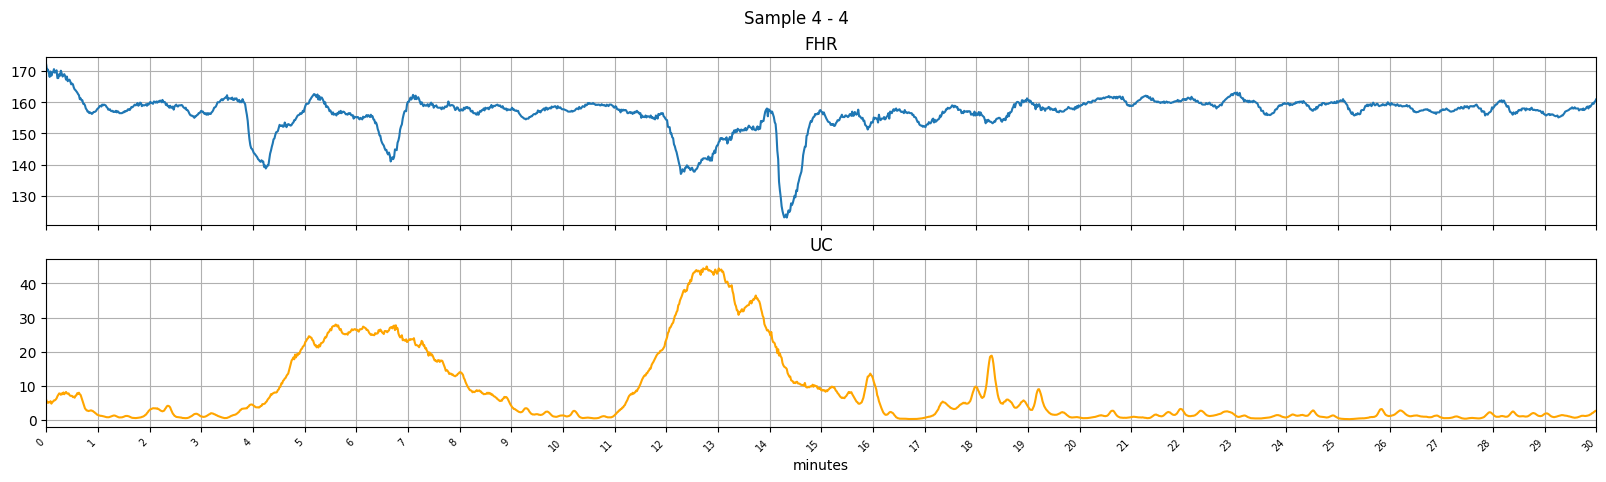

<Figure size 640x480 with 0 Axes>

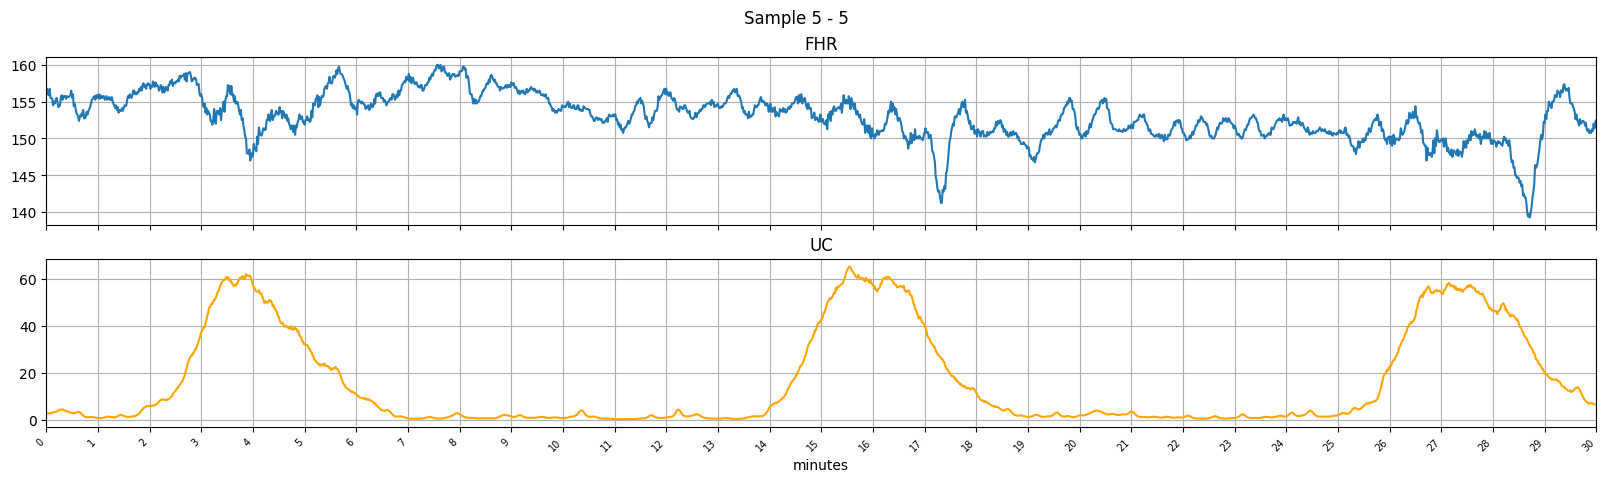

<Figure size 640x480 with 0 Axes>

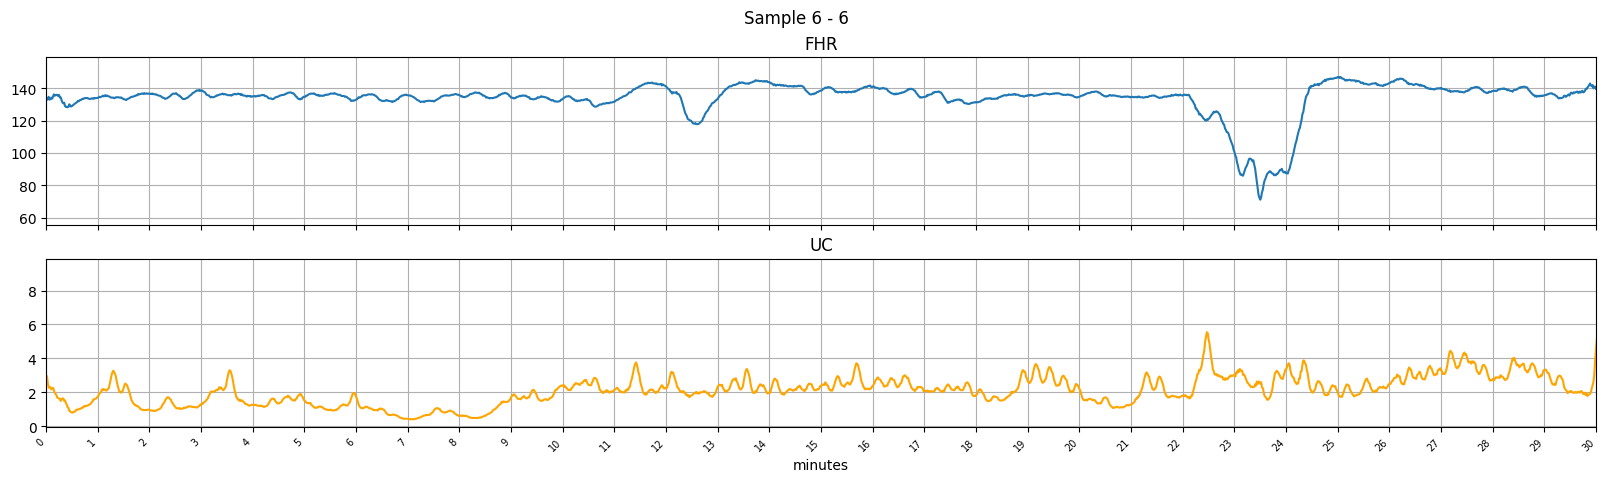

<Figure size 640x480 with 0 Axes>

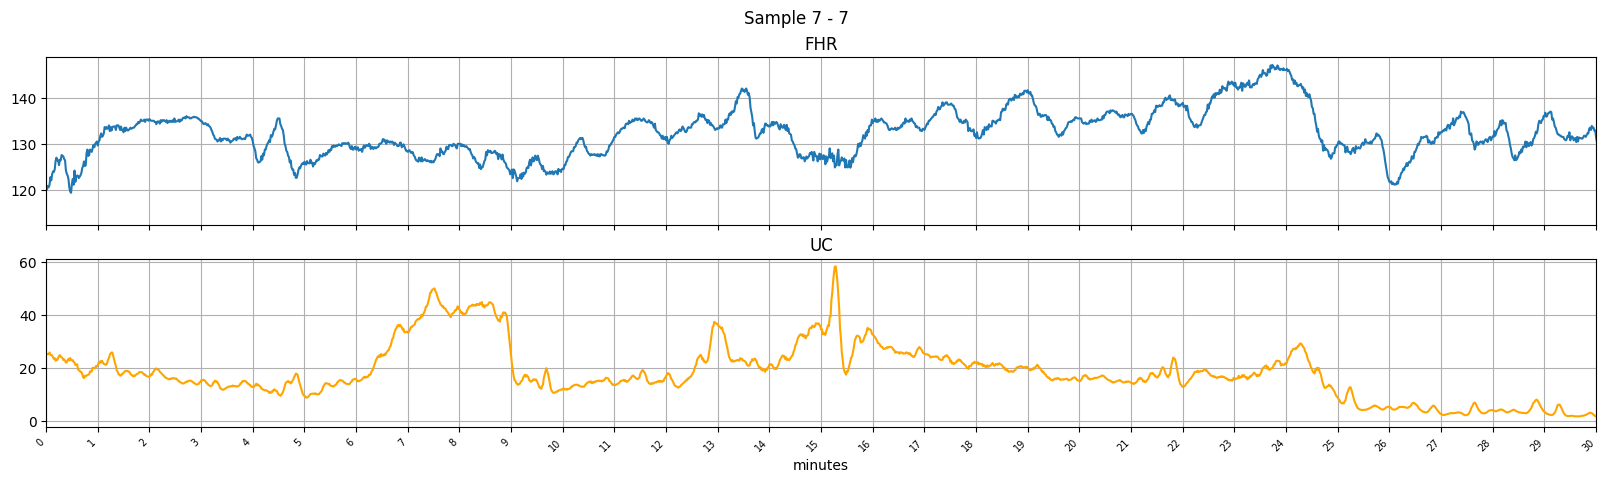

<Figure size 640x480 with 0 Axes>

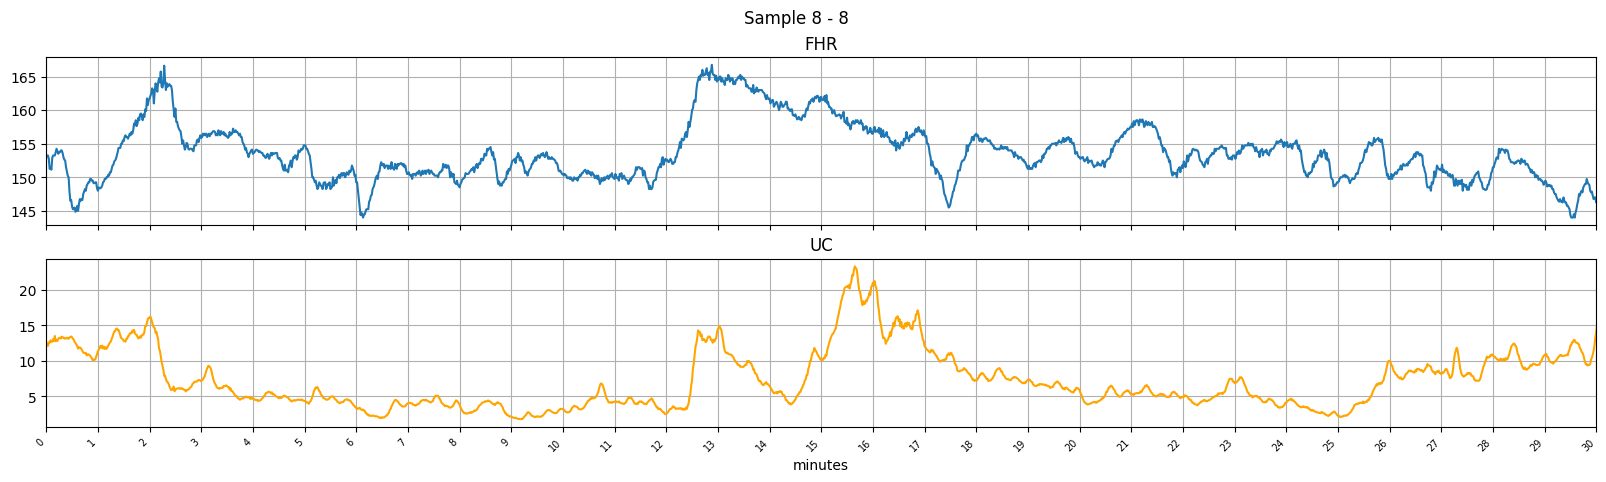

<Figure size 640x480 with 0 Axes>

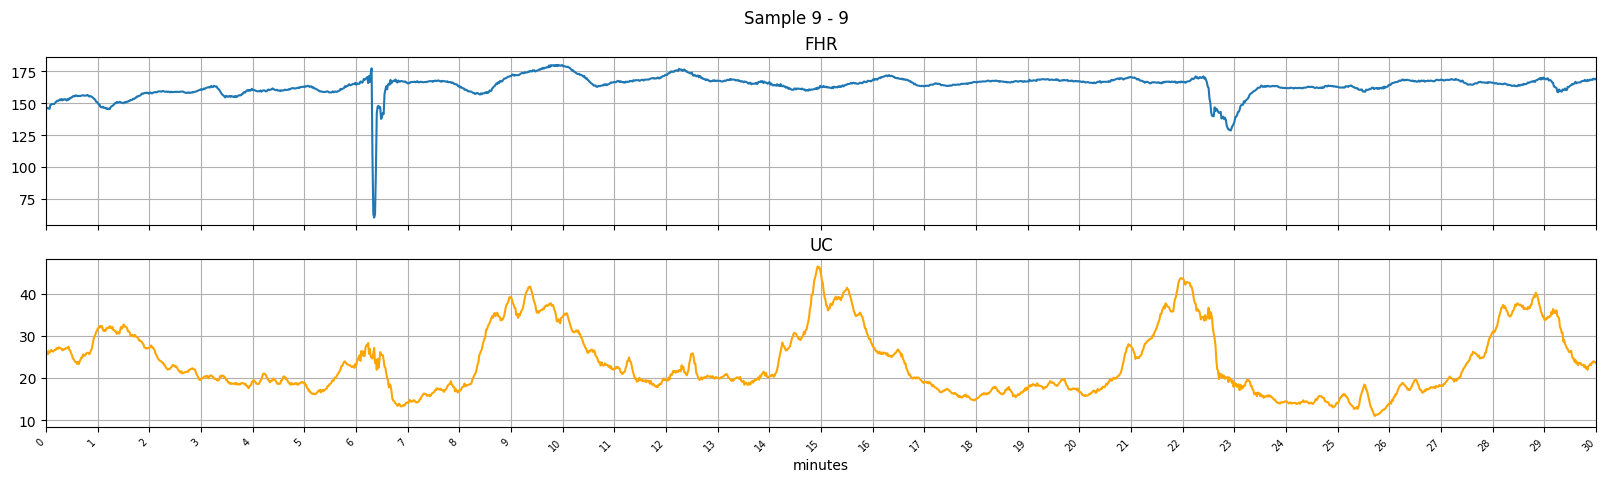

In [23]:
## HDF5:
hdf5_file = tables.open_file("output/sampling-czech-test/generated_samples.h5", mode="r")
# original samples:
## hdf5_file = tables.open_file(cfg.training_data, mode="r")

array = hdf5_file.root.samples.windows
labels = hdf5_file.root.samples.labels

for idx in range(0, 10):
    #input_file_sr = f"results/synthetic-{TS_LENGTH}/sample_sr_{sample_id}_{TS_LENGTH}.csv"
   
    #x = pd.read_csv(input_file_sr)
    #plot_patient_data(pd.DataFrame(x, columns=["FHR", "UC"]), title=f"Sample {sample_id} - {TIME_CAP//60} minutes")
    #plt.savefig(f"sample_{sample_id}_{TIME_CAP}_sr.png", format="png")

    # HDF5 stored shape: (sample_num, TS_LENGTH, 2) in unscaled form
    ts = unscale(array[idx].T, cfg.scale_factors).T
    plot_patient_data(pd.DataFrame(ts, columns=["FHR", "UC"]), title=f"Sample {idx} - {labels[idx]}")


hdf5_file.close()